### EDA 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('AIML Dataset.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dataset.shape

(6362620, 11)

In [4]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# Used to find if dataset has any missing values
dataset.isna().sum().any()

False

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
dataset.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
dataset.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
# Finding which categories have most frauds
dfFraudCash_Out = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]
dfFraudPayment = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'PAYMENT')]
dfFraudCash_in = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_IN')]
dfFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
dfFraudDebit = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'DEBIT')]

print(len(dfFraudCash_Out))
print(len(dfFraudPayment))
print(len(dfFraudCash_in))
print(len(dfFraudTransfer))
print(len(dfFraudDebit))

4116
0
0
4097
0


In [11]:
# we will be taking only these types into our data for analysis as they are the only one which have fraudulent transactions
fraud_cashout = dataset.loc[(dataset.isFraud == 1) & (dataset['type'] == 'CASH_OUT')]
fraud_transfer = dataset.loc[(dataset.isFraud == 1) & (dataset['type'] == 'TRANSFER')]

In [12]:
# finding how many not fraudulent transactions cash out and transfers have
dfnotFraudCash_Out = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'CASH_OUT')]
dfnotFraudTransfer = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'TRANSFER')]

print(len(dfnotFraudCash_Out))
print(len(dfnotFraudTransfer))

2233384
528812


In [13]:
#reshaping the data randomly to balance the dataset and reduce overfitting
data1 = dataset.loc[(dataset.isFraud == 0) & (dataset['type'] == 'CASH_OUT')].sample(frac=0.002)
data2 = dataset.loc[(dataset.isFraud == 0) & (dataset['type'] == 'TRANSFER')].sample(frac=0.008)

In [14]:
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5295083,373,CASH_OUT,5462.76,C608215523,21520.0,16057.24,C1348437140,0.00,5462.76,0,0
3161785,237,CASH_OUT,102033.37,C1776278511,97440.0,0.00,C1277092885,2390323.95,2492357.32,0,0
4433368,322,CASH_OUT,189250.59,C19481055,9949.0,0.00,C347626060,1052503.61,1241754.20,0,0
318068,16,CASH_OUT,18560.87,C1390341946,11502.0,0.00,C1810024103,21364.00,39924.87,0,0
168067,12,CASH_OUT,243991.25,C868558230,0.0,0.00,C1219538254,684131.15,1757120.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4933068,350,CASH_OUT,196253.74,C2001401394,0.0,0.00,C1654916677,5994064.41,6190318.15,0,0
436985,18,CASH_OUT,169973.92,C2052604750,81928.0,0.00,C500967627,21834.00,0.00,0,0
5463058,379,CASH_OUT,179851.75,C1638412817,10400.0,0.00,C867882588,35750.62,215602.37,0,0
2842019,226,CASH_OUT,341030.31,C2055542123,8285.0,0.00,C863577465,6484.37,347514.69,0,0


In [15]:
data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4206018,305,TRANSFER,8171787.77,C868622053,5004.0,0.00,C1088501262,423768.94,8595556.71,0,0
1833991,163,TRANSFER,264125.12,C710203377,0.0,0.00,C1139061328,859109.88,1123235.01,0,0
6157578,548,TRANSFER,51517.32,C1620463147,5584.0,0.00,C2095654925,253500.90,305018.22,0,0
1742819,161,TRANSFER,132075.73,C1983847657,0.0,0.00,C2078636125,476335.66,1019172.09,0,0
2481713,204,TRANSFER,834502.77,C625941667,0.0,0.00,C1502517182,1089887.35,1924390.13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1137107,131,TRANSFER,755383.52,C1626266159,2205.0,0.00,C1801931391,30035.00,0.00,0,0
5540581,382,TRANSFER,48717.29,C176945930,173435.0,124717.71,C2074781931,3282033.08,3330750.37,0,0
149571,12,TRANSFER,1339325.04,C1792668628,31814.0,0.00,C111747605,12410.30,1351735.34,0,0
4873921,348,TRANSFER,3245369.19,C2084982655,40978.0,0.00,C452365814,4428119.58,7673488.78,0,0


In [16]:
# creating our data set by concatenating the segregated data frames
fraud_data = pd.concat([data1,fraud_cashout, data2, fraud_transfer])
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5295083,373,CASH_OUT,5462.76,C608215523,21520.00,16057.24,C1348437140,0.00,5462.76,0,0
3161785,237,CASH_OUT,102033.37,C1776278511,97440.00,0.00,C1277092885,2390323.95,2492357.32,0,0
4433368,322,CASH_OUT,189250.59,C19481055,9949.00,0.00,C347626060,1052503.61,1241754.20,0,0
318068,16,CASH_OUT,18560.87,C1390341946,11502.00,0.00,C1810024103,21364.00,39924.87,0,0
168067,12,CASH_OUT,243991.25,C868558230,0.00,0.00,C1219538254,684131.15,1757120.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


In [17]:
fraud_data.isFraud.sum()

8213

Now, column **type** is Categorical object which we convert into Numerical Data to apply operations on it

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(fraud_data['type'])
label

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
# Inserting converted type data into our dataset
fraud_data.insert(2,'type_num', label)

In [20]:
# Converting nameOrig column into only ids by removing C from its front
fraud_data['nameOrig'] = fraud_data['nameOrig'].replace({'C': ''}, regex=True)
fraud_data

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5295083,373,CASH_OUT,0,5462.76,608215523,21520.00,16057.24,C1348437140,0.00,5462.76,0,0
3161785,237,CASH_OUT,0,102033.37,1776278511,97440.00,0.00,C1277092885,2390323.95,2492357.32,0,0
4433368,322,CASH_OUT,0,189250.59,19481055,9949.00,0.00,C347626060,1052503.61,1241754.20,0,0
318068,16,CASH_OUT,0,18560.87,1390341946,11502.00,0.00,C1810024103,21364.00,39924.87,0,0
168067,12,CASH_OUT,0,243991.25,868558230,0.00,0.00,C1219538254,684131.15,1757120.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,1,63416.99,778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1,1258818.82,1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,1,339682.13,2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,1,6311409.28,1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


In [21]:
fraud_data['nameOrig'] = pd.to_numeric(fraud_data['nameOrig'])
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 5295083 to 6362618
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16910 non-null  int64  
 1   type            16910 non-null  object 
 2   type_num        16910 non-null  int32  
 3   amount          16910 non-null  float64
 4   nameOrig        16910 non-null  int64  
 5   oldbalanceOrg   16910 non-null  float64
 6   newbalanceOrig  16910 non-null  float64
 7   nameDest        16910 non-null  object 
 8   oldbalanceDest  16910 non-null  float64
 9   newbalanceDest  16910 non-null  float64
 10  isFraud         16910 non-null  int64  
 11  isFlaggedFraud  16910 non-null  int64  
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 1.6+ MB


### Feature Selection

Columns **step, nameDest, type and isFlaggedFraud** are not taken into consideration for training our prediction models because
column **nameDest** is string which are not providing any significance to our data, **type** column is dropped because we already converted it into numerical data and **isFlaggedFraud** is removed because we believe that it is the pre determined output which needs to be found out by the model. Also **step** is just hour out of 30 days of simulation

In [22]:
fraud_data = fraud_data.drop(['step','nameDest', 'type','isFlaggedFraud'], axis=1)

In [23]:
fraud_data

,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
5295083,0,5462.76,608215523,21520.00,16057.24,0.00,5462.76,0
3161785,0,102033.37,1776278511,97440.00,0.00,2390323.95,2492357.32,0
4433368,0,189250.59,19481055,9949.00,0.00,1052503.61,1241754.20,0
318068,0,18560.87,1390341946,11502.00,0.00,21364.00,39924.87,0
168067,0,243991.25,868558230,0.00,0.00,684131.15,1757120.50,0
...,...,...,...,...,...,...,...,...
6362610,1,63416.99,778071008,63416.99,0.00,0.00,0.00,1
6362612,1,1258818.82,1531301470,1258818.82,0.00,0.00,0.00,1
6362614,1,339682.13,2013999242,339682.13,0.00,0.00,0.00,1
6362616,1,6311409.28,1529008245,6311409.28,0.00,0.00,0.00,1


In [24]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 5295083 to 6362618
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type_num        16910 non-null  int32  
 1   amount          16910 non-null  float64
 2   nameOrig        16910 non-null  int64  
 3   oldbalanceOrg   16910 non-null  float64
 4   newbalanceOrig  16910 non-null  float64
 5   oldbalanceDest  16910 non-null  float64
 6   newbalanceDest  16910 non-null  float64
 7   isFraud         16910 non-null  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 1.1 MB


In [25]:
#fraud_data.to_csv('fraud_data2.csv')

In [26]:
fraud_data.describe()

,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,16910.000000,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,16910.000000
mean,0.492431,9.934552e+05,1.079960e+09,8.237122e+05,1.008597e+05,1.333175e+06,2.002690e+06,0.485689
std,0.499957,2.022906e+06,6.203920e+08,2.601973e+06,1.375730e+06,4.863982e+06,5.708495e+06,0.499810
min,0.000000,0.000000e+00,1.453640e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.141185e+05,5.424082e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.437528e+04,0.000000
50%,0.000000,2.923384e+05,1.084595e+09,5.879850e+04,0.000000e+00,1.676164e+05,6.162674e+05,0.000000
75%,1.000000,8.563867e+05,1.617549e+09,4.468785e+05,0.000000e+00,1.146527e+06,2.072765e+06,1.000000
max,1.000000,4.170858e+07,2.147009e+09,5.958504e+07,4.958504e+07,2.362305e+08,2.594353e+08,1.000000


In [27]:
# Assigning values
X = fraud_data.iloc[:, :-1].values
y = fraud_data.iloc[:, -1].values

In [28]:
X

array([[0.00000000e+00, 5.46276000e+03, 6.08215523e+08, ...,
        1.60572400e+04, 0.00000000e+00, 5.46276000e+03],
       [0.00000000e+00, 1.02033370e+05, 1.77627851e+09, ...,
        0.00000000e+00, 2.39032395e+06, 2.49235732e+06],
       [0.00000000e+00, 1.89250590e+05, 1.94810550e+07, ...,
        0.00000000e+00, 1.05250361e+06, 1.24175420e+06],
       ...,
       [1.00000000e+00, 3.39682130e+05, 2.01399924e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.31140928e+06, 1.52900824e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.50002520e+05, 1.68599504e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Splitting data into train and test set and also apply Feature Scaling

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Logistic Regression Model on training set

In [32]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


#### Making the Confusion Matrix

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2035  120]
 [ 295 1778]]
Accuracy of model: 0.901844843897824


#### Recall Calculation

In [35]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8576941630487217


#### F1 Score Calculation

In [36]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8954923193150339


### Training on SVM

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2030  125]
 [ 296 1777]]
Accuracy of model: 0.9004257332071902


In [40]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8572117703810902


In [41]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8940880503144654


### Training on Naive bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = bayes.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2117   38]
 [1176  897]]
Accuracy of model: 0.7128666035950804


In [45]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.43270622286541244


In [46]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.5964095744680851


### Decision Tree

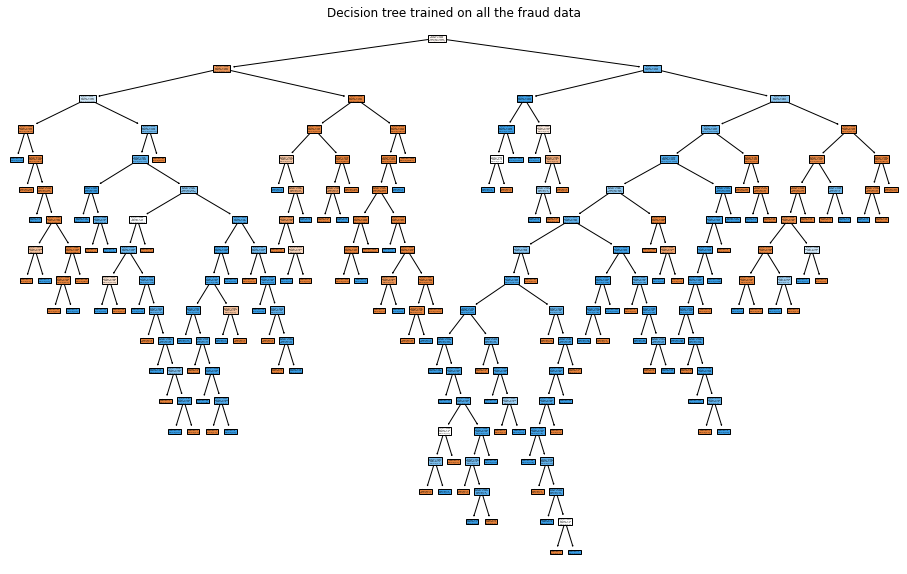

In [47]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dr.fit(X_train, y_train)
fig = plt.figure(figsize=(16,10))
tree.plot_tree(dr, filled=True)
plt.title("Decision tree trained on all the fraud data")
plt.show()

In [71]:
fig.savefig("decistion_tree.png")

In [48]:
y_pred = dr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2132   23]
 [  18 2055]]
Accuracy of model: 0.990302743614002


In [50]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.9913169319826338


In [51]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.9901228619609732


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [53]:
y_pred = rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2115   40]
 [  14 2059]]
Accuracy of model: 0.9872280037842952


In [55]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.9932465026531597


In [56]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.9870565675934803


### Training with Kernel SVM

In [57]:
from sklearn.svm import SVC
kernel_svm = SVC(kernel = 'rbf', random_state = 0)
kernel_svm.fit(X_train, y_train)

SVC(random_state=0)

In [58]:
y_pred = kernel_svm.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2024  131]
 [ 381 1692]]


0.8789025543992431

In [60]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8162083936324168


In [61]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8685831622176592


### Predicting a single input

In [62]:
# type_num	amount	nameOrig	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest
print(classifier.predict(sc.transform([[0,74445.62,1796046115,0.00,0.0,1371784.99,1446230.61]])))

print(classifier.predict([[1,63416.99,778071008,63416.99,0.0,0.00,0.00]]))

[0]
[1]


We can see from above prediction that it came up with correct prediction for the above query

### Saving our model

In [67]:
# import pickle

# # Dumping our model into a file
# with open('fraud_model3.bin', 'wb') as f_out:
#     pickle.dump(dr, f_out)

### Trying our pickle model

In [68]:
# with open('fraud_model3.bin', 'rb') as f_in:
#     model3 = pickle.load(f_in)

In [70]:
# predicting the single value which we predicted before
# predict_mpg(sc.transform([[3, 14650.1, 908817173, 19373.0, 4722.9, 0.0, 0.0,]]), model)

model3.predict([[2, 14650.1, 908817173, 19373.0, 4722.9, 0.0, 0.0]])

array([0], dtype=int64)

It gives the same result from before, it means our model is working fine